In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.gridspec import GridSpec

import mplhep as hep
hep.style.use('ATLAS')

Processing centrality 0_20...
Processing centrality 20_40...
Processing centrality 40_60...
Processing centrality 60_80...
Processing centrality 80_100...
Successfully processed 500/500 events


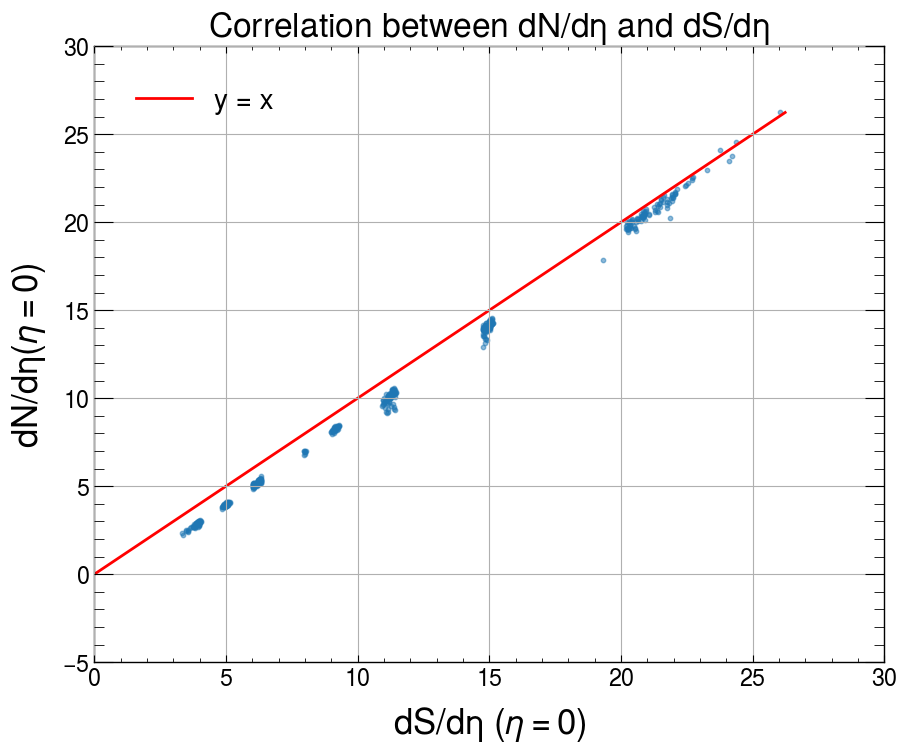

In [2]:
# 配置参数
base_path = "/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work/d_Au_DWF"
cent_classes = ['0_20', '20_40', '40_60', '60_80', '80_100']
num_events_per_class = 100
total_events = len(cent_classes) * num_events_per_class

# 初始化存储数组
entropy_values = np.zeros(total_events)
hydro_values = np.zeros(total_events)

# 处理每个中心度类别
event_counter = 0
for cent in cent_classes:
    print(f"Processing centrality {cent}...")
    
    # 1. 读取熵密度数据
    entropy_path = f"{base_path}/entropy3d/entropy3d_ebe/plat_1p3_gw_1p3/entropy_cent_{cent}/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0.h5"
    
    # 2. 读取流体结果数据
    hydro_path = f"{base_path}/hydro_result/ebe_mc_nsampling_2000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0/dAu200/{cent}"
    
    # 处理每个事件
    for i in range(num_events_per_class):
        try:
            # 读取熵密度数据
            with h5py.File(entropy_path, 'r') as f:
                event_name = f'event_{i}'
                data_3d = f[event_name][:]  # (121, 200, 200)
                
                # 获取中心值 (第60或61个点，因为121是奇数)
                center_idx = 60
                center_slice = data_3d[center_idx, :, :]
                entropy = np.sum(center_slice)  # 对中心切片求和
            
            # 读取流体结果数据
            event_dir = os.path.join(hydro_path, f"event{i}")
            hydro_file = os.path.join(event_dir, "dNdEta_mc_charged.dat")
            hydro_data = np.loadtxt(hydro_file)
            
            # 获取流体中心值 (处理偶数情况)
            n_points = len(hydro_data)
            if n_points % 2 == 0:  # 偶数取中间两个平均值
                mid1 = n_points // 2 - 1
                mid2 = n_points // 2
                hydro = (hydro_data[mid1, 1] + hydro_data[mid2, 1]) / 2
            else:  # 奇数直接取中间
                mid = n_points // 2
                hydro = hydro_data[mid, 1]
            
            # 存储结果
            entropy_values[event_counter] = entropy
            hydro_values[event_counter] = hydro
            event_counter += 1
            
        except Exception as e:
            print(f"Error processing event {i} in centrality {cent}: {str(e)}")
            continue

# 确保我们得到了所有有效数据点
dtau0 = 0.6
dx = 0.16
dy = 0.16
deta = 0.115
dtau = dtau0 * dx * dy * deta

valid_indices = (entropy_values != 0) & (hydro_values != 0)
entropy_values = entropy_values[valid_indices]*dtau
hydro_values = hydro_values[valid_indices]

print(f"Successfully processed {len(entropy_values)}/{total_events} events")

# 绘制关系图
plt.figure(figsize=(10, 8))
plt.scatter(entropy_values, hydro_values, alpha=0.5, s=10)
plt.xlabel(r'$\rm dS/d\eta$ ($\eta=0$)', ha='center', fontsize=25)
plt.ylabel(r'$\rm dN/d\eta$($\eta=0$)', ha='center', fontsize=25)
plt.title(r'Correlation between $\rm dN/d\eta$ and $\rm dS/d\eta$')
plt.grid(True)

# 添加y=x参考线
max_val = max(np.max(entropy_values), np.max(hydro_values))
plt.plot([0, max_val], [0, max_val], 'r-', linewidth=2, label='y = x')
plt.legend(fontsize=20)

plt.show()

Processing centrality 0_20...
Processing centrality 20_40...
Processing centrality 40_60...
Processing centrality 60_80...
Processing centrality 80_100...
Linear fit: slope = 1.0311, intercept = -1.2598, R² = 0.9986


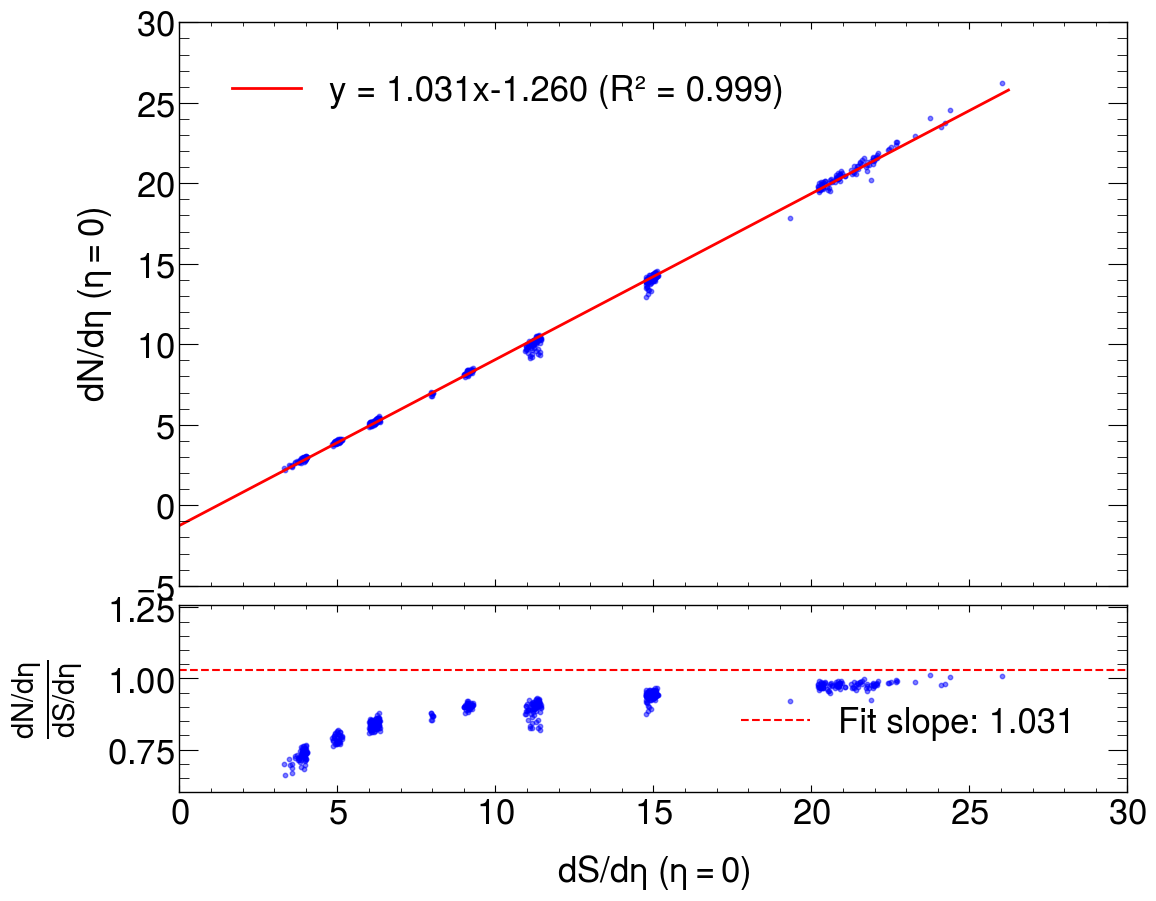

In [5]:

from scipy.stats import linregress

# 配置参数
base_path = "/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work/d_Au_DWF"
cent_classes = ['0_20', '20_40', '40_60', '60_80', '80_100']
num_events_per_class = 100
total_events = len(cent_classes) * num_events_per_class

# 初始化存储数组
entropy_values = np.zeros(total_events)
hydro_values = np.zeros(total_events)

# 处理每个中心度类别
event_counter = 0
for cent in cent_classes:
    print(f"Processing centrality {cent}...")
    
    # 1. 读取熵密度数据
    entropy_path = f"{base_path}/entropy3d/entropy3d_ebe/plat_1p3_gw_1p3/entropy_cent_{cent}/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0.h5"
    
    # 2. 读取流体结果数据
    hydro_path = f"{base_path}/hydro_result/ebe_mc_nsampling_2000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0/dAu200/{cent}"
    
    # 处理每个事件
    for i in range(num_events_per_class):
        try:
            # 读取熵密度数据
            with h5py.File(entropy_path, 'r') as f:
                event_name = f'event_{i}'
                data_3d = f[event_name][:]  # (121, 200, 200)
                
                # 获取中心值 (第60或61个点，因为121是奇数)
                center_idx = 60
                center_slice = data_3d[center_idx, :, :]
                entropy = np.sum(center_slice)  # 对中心切片求和
            
            # 读取流体结果数据
            event_dir = os.path.join(hydro_path, f"event{i}")
            hydro_file = os.path.join(event_dir, "dNdEta_mc_charged.dat")
            hydro_data = np.loadtxt(hydro_file)
            
            # 获取流体中心值 (处理偶数情况)
            n_points = len(hydro_data)
            if n_points % 2 == 0:  # 偶数取中间两个平均值
                mid1 = n_points // 2 - 1
                mid2 = n_points // 2
                hydro = (hydro_data[mid1, 1] + hydro_data[mid2, 1]) / 2
            else:  # 奇数直接取中间
                mid = n_points // 2
                hydro = hydro_data[mid, 1]
            
            # 存储结果
            entropy_values[event_counter] = entropy
            hydro_values[event_counter] = hydro
            event_counter += 1
            
        except Exception as e:
            print(f"Error processing event {i} in centrality {cent}: {str(e)}")
            continue

# 确保我们得到了所有有效数据点
dtau0 = 0.6
dx = 0.16
dy = 0.16
deta = 0.115
dtau = dtau0 * dx * dy * deta

valid_indices = (entropy_values != 0) & (hydro_values != 0)
entropy_values = entropy_values[valid_indices]*dtau
hydro_values = hydro_values[valid_indices]

# 计算线性拟合
slope, intercept, r_value, p_value, std_err = linregress(entropy_values, hydro_values)
print(f"Linear fit: slope = {slope:.4f}, intercept = {intercept:.4f}, R² = {r_value**2:.4f}")

# 计算ratio (使用线性拟合的斜率)
ratio_values = hydro_values / entropy_values
mean_ratio = np.mean(ratio_values)
median_ratio = np.median(ratio_values)

# 创建图形布局
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)

# 主图：相关性图（上方）
ax0 = plt.subplot(gs[0])
sc = ax0.scatter(entropy_values, hydro_values, alpha=0.5, s=10, color='blue')

# 绘制线性拟合线
max_val = max(np.max(entropy_values), np.max(hydro_values))
x_fit = np.linspace(0, max_val, 100)
y_fit = slope * x_fit + intercept
ax0.plot(x_fit, y_fit, 'r-', linewidth=2, 
         label=f'y = {slope:.3f}x{ intercept:.3f} (R² = {r_value**2:.3f})')

# 设置坐标轴标签和刻度
ax0.set_ylabel(r'$\rm dN/d\eta$ ($\rm \eta=0$)', ha='center', fontsize=25, labelpad=15)
ax0.legend(fontsize=25, loc='upper left')

# 增大刻度字体
ax0.tick_params(axis='both', which='major', labelsize=25)
ax0.tick_params(axis='both', which='minor', labelsize=25)
ax0.set_xticklabels([])  # 移除x轴标签

# Ratio图（下方）
ax1 = plt.subplot(gs[1])
ax1.scatter(entropy_values, ratio_values, alpha=0.5, s=10, color='blue')

# 使用拟合斜率作为参考线
ax1.axhline(y=slope, color='red', linestyle='--', linewidth=1.5,
            label=f'Fit slope: {slope:.3f}')

# 设置坐标轴标签和刻度
ax1.set_ylabel(r'$\rm \frac{dN/d\eta}{dS/d\eta}$', ha='center', fontsize=30, labelpad=15)  # Modified this line
ax1.set_xlabel(r'$\rm dS/d\eta$ ($\rm \eta=0$)', ha='center', fontsize=25, labelpad=15)

# 将图例移动到右下角并调整样式
ax1.legend(fontsize=25, loc='best', framealpha=0.7)

# 设置y轴范围以避免图例遮挡数据
current_ylim = ax1.get_ylim()
# 保持当前范围但确保有足够的空间
ax1.set_ylim(current_ylim[0], current_ylim[1] * 1.05)  # 增加5%的上部空间

# 增大刻度字体
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)

# 调整布局并保存
# plt.tight_layout()
# plt.savefig('fig/dNdeta_dSdeta_ratio_fit_slope.pdf', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

Processing centrality 0_20...
Processing centrality 20_40...
Processing centrality 40_60...
Processing centrality 60_80...
Processing centrality 80_100...
Linear fit: slope = 1.0132, intercept = -1.1307, R² = 0.9973
Adjusted ratio - Mean: 1.0181, Median: 1.0203


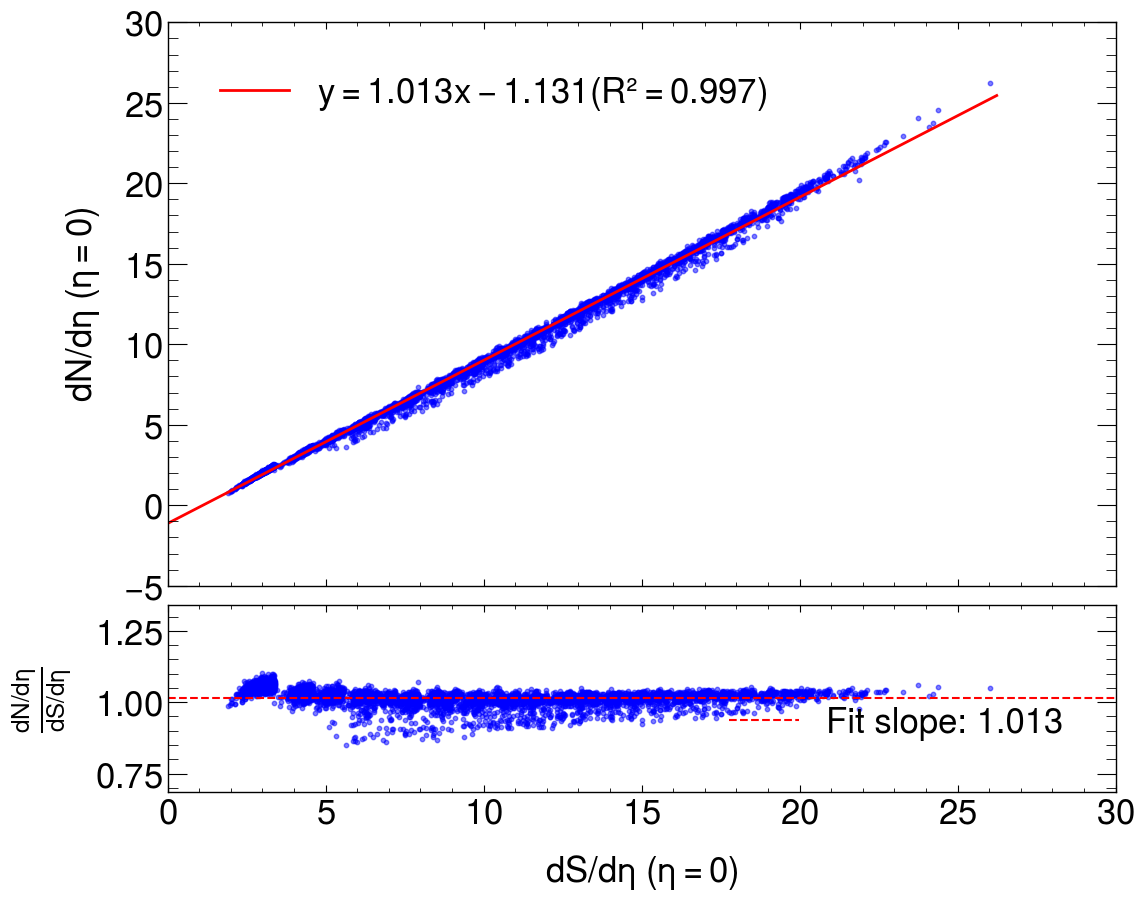

In [20]:
# 配置参数
base_path = "/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work/d_Au_DWF"
cent_classes = ['0_20', '20_40', '40_60', '60_80', '80_100']
num_events_per_class = 1000
total_events = len(cent_classes) * num_events_per_class

# 初始化存储数组
entropy_values = np.zeros(total_events)
hydro_values = np.zeros(total_events)

# 处理每个中心度类别
event_counter = 0
for cent in cent_classes:
    print(f"Processing centrality {cent}...")
    
    # 1. 读取熵密度数据
    entropy_path = f"{base_path}/entropy3d/entropy3d_ebe/plat_1p3_gw_1p3/entropy_cent_{cent}/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0.h5"
    
    # 2. 读取流体结果数据
    hydro_path = f"{base_path}/hydro_result/ebe_mc_nsampling_2000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0/dAu200/{cent}"
    
    # 处理每个事件
    for i in range(num_events_per_class):
        try:
            # 读取熵密度数据
            with h5py.File(entropy_path, 'r') as f:
                event_name = f'event_{i}'
                data_3d = f[event_name][:]  # (121, 200, 200)
                
                # 获取中心值 (第60或61个点，因为121是奇数)
                center_idx = 60
                center_slice = data_3d[center_idx, :, :]
                entropy = np.sum(center_slice)  # 对中心切片求和
            
            # 读取流体结果数据
            event_dir = os.path.join(hydro_path, f"event{i}")
            hydro_file = os.path.join(event_dir, "dNdEta_mc_charged.dat")
            hydro_data = np.loadtxt(hydro_file)
            
            # 获取流体中心值 (处理偶数情况)
            n_points = len(hydro_data)
            if n_points % 2 == 0:  # 偶数取中间两个平均值
                mid1 = n_points // 2 - 1
                mid2 = n_points // 2
                hydro = (hydro_data[mid1, 1] + hydro_data[mid2, 1]) / 2
            else:  # 奇数直接取中间
                mid = n_points // 2
                hydro = hydro_data[mid, 1]
            
            # 存储结果
            entropy_values[event_counter] = entropy
            hydro_values[event_counter] = hydro
            event_counter += 1
            
        except Exception as e:
            print(f"Error processing event {i} in centrality {cent}: {str(e)}")
            continue

# 确保我们得到了所有有效数据点
dtau0 = 0.6
dx = 0.16
dy = 0.16
deta = 0.115
dtau = dtau0 * dx * dy * deta

valid_indices = (entropy_values != 0) & (hydro_values != 0)
entropy_values = entropy_values[valid_indices] * dtau
hydro_values = hydro_values[valid_indices]

# 计算线性拟合
slope, intercept, r_value, p_value, std_err = linregress(entropy_values, hydro_values)
print(f"Linear fit: slope = {slope:.4f}, intercept = {intercept:.4f}, R² = {r_value**2:.4f}")

# 计算调整后的ratio (减去截距后再除以熵值)
ratio_values = (hydro_values - intercept) / entropy_values
mean_ratio = np.mean(ratio_values)
median_ratio = np.median(ratio_values)
print(f"Adjusted ratio - Mean: {mean_ratio:.4f}, Median: {median_ratio:.4f}")

# 创建图形布局
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)

# 主图：相关性图（上方）
ax0 = plt.subplot(gs[0])
sc = ax0.scatter(entropy_values, hydro_values, alpha=0.5, s=10, color='blue')

# 绘制线性拟合线
max_val = max(np.max(entropy_values), np.max(hydro_values))
x_fit = np.linspace(0, max_val, 100)
y_fit = slope * x_fit + intercept
ax0.plot(x_fit, y_fit, 'r-', linewidth=2, 
         label=rf'$\rm y = {slope:.3f}x{intercept:.3f} (R² = {r_value**2:.3f})$')

# 设置坐标轴标签和刻度
ax0.set_ylabel(r'$\rm dN/d\eta$ ($\rm \eta=0$)', ha='center', fontsize=25, labelpad=15)
ax0.legend(fontsize=25, loc='upper left')

# 增大刻度字体
ax0.tick_params(axis='both', which='major', labelsize=25)
ax0.tick_params(axis='both', which='minor', labelsize=25)
ax0.set_xticklabels([])  # 移除x轴标签

# Ratio图（下方）
ax1 = plt.subplot(gs[1])
ax1.scatter(entropy_values, ratio_values, alpha=0.5, s=10, color='blue')

# 使用拟合斜率作为参考线
ax1.axhline(y=slope, color='red', linestyle='--', linewidth=1.5,
            label=f'Fit slope: {slope:.3f}')

# 设置y轴范围以更好地显示斜率附近的波动
y_range = max(abs(ratio_values - slope)) * 2.0  # 2.0倍的最大偏差
ax1.set_ylim(slope - y_range, slope + y_range)

# 设置坐标轴标签和刻度
# ax1.set_ylabel(r'$\rm \frac{dN/d\eta - intercept}{dS/d\eta}$', ha='center', fontsize=25, labelpad=15)
ax1.set_ylabel(r'$\rm \frac{dN/d\eta}{dS/d\eta}$', ha='center', fontsize=25, labelpad=15)
ax1.set_xlabel(r'$\rm dS/d\eta$ ($\rm \eta=0$)', ha='center', fontsize=25, labelpad=15)

# 将图例移动到右下角并调整样式
ax1.legend(fontsize=25, loc='lower right', framealpha=0.7)

# 增大刻度字体
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)

# 调整布局并保存
# plt.tight_layout()
plt.savefig('fig/dNdeta_dSdeta_ratio_fit_slope_adjusted.pdf', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()